# Predicting house prices: a regression example
## The Boston Housing Price dataset

  -  we have to predict price                 
  -  boston housing mid-1970
  -  506 data samples
  -  404 training and 102 testing samples
  -  13 Features (number of columns in X)
  - Regression give always continuous value

  ### Loading Important Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt

### Loading the Boston housing dataset

In [2]:
(train_data, train_targets),(test_data, test_targets)=boston_housing.load_data()
print(train_data.shape)  # Training Data = 404 rows ,13 columns 
print(test_data.shape)   # Testing Data = 102 rows , 13 columns
print(train_targets)

57344/57026 [==============================] - 1s 9us/step
(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 3

In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [4]:
train_targets[0]

15.2

## Preparing the Data

In [5]:
mean = train_data.mean(axis=0)  # axis=0=column
train_data-=mean
std= train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [6]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

## Build Model

    - If data has less then we use K-Fold Method, Training Data break into number of k, if i give 10 number, then it distribute training data into 10

In [13]:
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # 13 input
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # in regression in last layer no regression problem
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) #mae=mean absolute error, mse=mean square error
    return model

## K-fold validation

In [15]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
model = build_model()
history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)  #verbose= nothing show like loss, epochs etc
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

## Building the history of successive mean K-fold validation scores

In [17]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
average_mae_history

[5.126839637756348,
 3.884192943572998,
 3.3412373065948486,
 3.32434344291687,
 3.1041290760040283,
 3.0455727577209473,
 2.9750707149505615,
 2.9881768226623535,
 2.997713804244995,
 2.8427069187164307,
 2.7289958000183105,
 2.705578565597534,
 2.7395448684692383,
 2.8961262702941895,
 2.899559736251831,
 2.5917792320251465,
 2.9821829795837402,
 2.892482042312622,
 2.8233397006988525,
 2.609553575515747,
 2.7412867546081543,
 2.6065030097961426,
 2.724155902862549,
 2.5714550018310547,
 2.6918373107910156,
 2.5905232429504395,
 2.5028131008148193,
 2.5087554454803467,
 2.764132022857666,
 2.7048826217651367,
 2.565516948699951,
 2.474553346633911,
 2.472053050994873,
 2.6715915203094482,
 2.491697072982788,
 2.473139762878418,
 2.4404327869415283,
 2.6911544799804688,
 2.6237902641296387,
 2.779170274734497,
 2.508143663406372,
 2.5508604049682617,
 2.4800472259521484,
 2.8775081634521484,
 2.4435055255889893,
 2.800069570541382,
 2.6871955394744873,
 2.486248016357422,
 2.516304492

In [20]:
print('All fold validation error: ', all_scores)
print('Mean of all fold validation error: ', np.mean(all_scores))
print('average_mae_history: ', average_mae_history)

All fold validation error:  []
Mean of all fold validation error:  nan
average_mae_history:  [5.126839637756348, 3.884192943572998, 3.3412373065948486, 3.32434344291687, 3.1041290760040283, 3.0455727577209473, 2.9750707149505615, 2.9881768226623535, 2.997713804244995, 2.8427069187164307, 2.7289958000183105, 2.705578565597534, 2.7395448684692383, 2.8961262702941895, 2.899559736251831, 2.5917792320251465, 2.9821829795837402, 2.892482042312622, 2.8233397006988525, 2.609553575515747, 2.7412867546081543, 2.6065030097961426, 2.724155902862549, 2.5714550018310547, 2.6918373107910156, 2.5905232429504395, 2.5028131008148193, 2.5087554454803467, 2.764132022857666, 2.7048826217651367, 2.565516948699951, 2.474553346633911, 2.472053050994873, 2.6715915203094482, 2.491697072982788, 2.473139762878418, 2.4404327869415283, 2.6911544799804688, 2.6237902641296387, 2.779170274734497, 2.508143663406372, 2.5508604049682617, 2.4800472259521484, 2.8775081634521484, 2.4435055255889893, 2.800069570541382, 2.687

/home/nauman/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nauman/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [21]:
[len(x) for x in all_mae_histories]

[500]

## Plotting Error

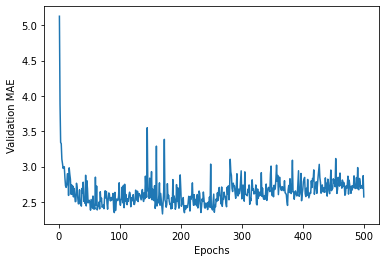

In [22]:
plt.plot(range(1, len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Plotting validation scores, excluding the first 10 data points(Smooth Curve)

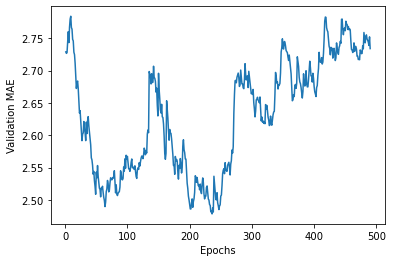

In [23]:


def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training and Validation Final Model on Complete DataSet

In [24]:
model=build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score=model.evaluate(test_data,test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 5ms/step - loss: 19.1987 - mae: 2.6429
2.642913818359375
